#### 12/8/2020
## COMP 541 - Assignment 4 - Team 6

# 1. Data Cleaning and Transformation 

Using data cleaning and transformation methods, apply these methods to your group project datasets and do the following tasks:

fill in null values
,find outliners and decide what to do
,discretize data (if needed)
normalize data

## 1.1. Importing Libraries

In [42]:
import pandas as pd # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt # a popular  data visualization tool
import seaborn as sns   # another popular data visualization tool

%matplotlib inline  # allows the notebook to render graphics

plt.style.use('fivethirtyeight')    # a popular data visualization theme

## 1.2. Identifying Missing Values

In [43]:
df = pd.read_csv('data/raw_training_data.csv')

In [44]:
df.shape # (# rows, # cols)

(3524, 32)

In [45]:
df.head() # take a peak at the dataset

,Unnamed: 0,budget,company,country,director,genre,gross,name,rating,released,...,original_title,overview,popularity,tagline,title,genres_edited,spoken_languages_edited,production_countries_edited,keywords_edited,year_released
0,0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22.08.1986 00:00,...,Stand by Me,"After the death of a friend, a writer recounts...",15.206957,"For some, it's the last real taste of innocenc...",Stand by Me,"Crime, Drama",en,US,"based on novel, friendship, coming of age, rai...",1986
1,1,6000000,Paramount Pictures,USA,Other,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11.06.1986 00:00,...,Ferris Bueller's Day Off,Charismatic teen Ferris Bueller plays hooky in...,12.724645,One man's struggle to take it easy.,Ferris Bueller's Day Off,Comedy,en,US,"chicago, high school, aftercreditsstinger, dur...",1986
2,2,15000000,Paramount Pictures,USA,Other,Action,179800601,Top Gun,PG,16.05.1986 00:00,...,Top Gun,For Lieutenant Pete 'Maverick' Mitchell and hi...,20.301019,Up there with the best of the best.,Top Gun,"Action, Romance, War",en,US,"lovesickness, loss of lover, fighter pilot, se...",1986
3,3,18500000,Twentieth Century Fox Film Corporation,USA,Other,Action,85160248,Aliens,R,18.07.1986 00:00,...,Aliens,When Ripley's lifepod is found by a salvage cr...,21.761179,This Time It's War,Aliens,"Horror, Action, Thriller, Science Fiction",en,"GB, US","android, extraterrestrial technology, space ma...",1986
4,4,9000000,Walt Disney Pictures,USA,Other,Adventure,18564613,Flight of the Navigator,PG,1.08.1986 00:00,...,Flight of the Navigator,This 1986 Disney adventure tells the story of ...,5.526865,Come along on the greatest adventure of the su...,Flight of the Navigator,"Family, Science Fiction, Adventure",en,US,"artificial intelligence, farewell, homesicknes...",1986


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3524 non-null   int64  
 1   budget                       3524 non-null   int64  
 2   company                      3524 non-null   object 
 3   country                      3524 non-null   object 
 4   director                     3524 non-null   object 
 5   genre                        3524 non-null   object 
 6   gross                        3524 non-null   int64  
 7   name                         3524 non-null   object 
 8   rating                       3524 non-null   object 
 9   released                     3524 non-null   object 
 10  runtime                      3524 non-null   int64  
 11  score                        3524 non-null   float64
 12  star                         3524 non-null   object 
 13  votes             

In [47]:
df.isnull().sum()

Unnamed: 0                       0
budget                           0
company                          0
country                          0
director                         0
genre                            0
gross                            0
name                             0
rating                           0
released                         0
runtime                          0
score                            0
star                             0
votes                            0
writer                           0
year                             0
isprofit                         0
profitability_ratio              0
profitability_ratio_bucket       0
adult                            0
id                               0
imdb_id                          0
original_title                   0
overview                         1
popularity                       0
tagline                        371
title                            0
genres_edited                    0
spoken_languages_edi

In [48]:
df.describe()   # before replacing zero with None

,Unnamed: 0,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3524.000000,3.524000e+03,3.524000e+03,3524.000000,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,1761.500000,3.646837e+07,4.772520e+07,107.189274,6.339018,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,9.785946,2002.385641
std,1017.435502,4.063369e+07,6.707121e+07,18.472177,1.056288,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,13.318482,8.422442
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,880.750000,1.000000e+07,6.955428e+06,95.000000,5.800000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,5.746421,1996.000000
50%,1761.500000,2.300000e+07,2.511110e+07,104.000000,6.400000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,8.411079,2003.000000
75%,2642.250000,4.800000e+07,6.036672e+07,117.000000,7.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,11.654501,2010.000000
max,3523.000000,3.000000e+08,9.366622e+08,271.000000,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


## 1.3. Dealing with Missing Values

By observing the data, we see that only the following columns need initial transformation to replace zeros with the value None:
* overview
* tagline
* spoken_languages_edited
* production_countries_edited
* keywords_edited

And the remaining features did not have to change since they did not contain zero values.

In [50]:
df['overview'] = df['overview'].map(lambda x:x if x != 0 else None)
df['tagline'] = df['tagline'].map(lambda x:x if x != 0 else None)
df['spoken_languages_edited'] = df['spoken_languages_edited'].map(lambda x:x if x != 0 else None)
df['production_countries_edited'] = df['production_countries_edited'].map(lambda x:x if x != 0 else None)
df['keywords_edited'] = df['keywords_edited'].map(lambda x:x if x != 0 else None)

In [83]:
df.head()   # take a peak at the dataset

,Unnamed: 0,budget,company,country,director,genre,gross,name,rating,released,...,original_title,overview,popularity,tagline,title,genres_edited,spoken_languages_edited,production_countries_edited,keywords_edited,year_released
0,0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22.08.1986 00:00,...,Stand by Me,"After the death of a friend, a writer recounts...",15.206957,"For some, it's the last real taste of innocenc...",Stand by Me,"Crime, Drama",en,US,"based on novel, friendship, coming of age, rai...",1986
1,1,6000000,Paramount Pictures,USA,Other,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11.06.1986 00:00,...,Ferris Bueller's Day Off,Charismatic teen Ferris Bueller plays hooky in...,12.724645,One man's struggle to take it easy.,Ferris Bueller's Day Off,Comedy,en,US,"chicago, high school, aftercreditsstinger, dur...",1986
2,2,15000000,Paramount Pictures,USA,Other,Action,179800601,Top Gun,PG,16.05.1986 00:00,...,Top Gun,For Lieutenant Pete 'Maverick' Mitchell and hi...,20.301019,Up there with the best of the best.,Top Gun,"Action, Romance, War",en,US,"lovesickness, loss of lover, fighter pilot, se...",1986
3,3,18500000,Twentieth Century Fox Film Corporation,USA,Other,Action,85160248,Aliens,R,18.07.1986 00:00,...,Aliens,When Ripley's lifepod is found by a salvage cr...,21.761179,This Time It's War,Aliens,"Horror, Action, Thriller, Science Fiction",en,"GB, US","android, extraterrestrial technology, space ma...",1986
4,4,9000000,Walt Disney Pictures,USA,Other,Adventure,18564613,Flight of the Navigator,PG,1.08.1986 00:00,...,Flight of the Navigator,This 1986 Disney adventure tells the story of ...,5.526865,Come along on the greatest adventure of the su...,Flight of the Navigator,"Family, Science Fiction, Adventure",en,US,"artificial intelligence, farewell, homesicknes...",1986


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3524 non-null   int64  
 1   budget                       3524 non-null   int64  
 2   company                      3524 non-null   object 
 3   country                      3524 non-null   object 
 4   director                     3524 non-null   object 
 5   genre                        3524 non-null   object 
 6   gross                        3524 non-null   int64  
 7   name                         3524 non-null   object 
 8   rating                       3524 non-null   object 
 9   released                     3524 non-null   object 
 10  runtime                      3524 non-null   int64  
 11  score                        3524 non-null   float64
 12  star                         3524 non-null   object 
 13  votes             

In [52]:
df.isnull().sum()

Unnamed: 0                       0
budget                           0
company                          0
country                          0
director                         0
genre                            0
gross                            0
name                             0
rating                           0
released                         0
runtime                          0
score                            0
star                             0
votes                            0
writer                           0
year                             0
isprofit                         0
profitability_ratio              0
profitability_ratio_bucket       0
adult                            0
id                               0
imdb_id                          0
original_title                   0
overview                         1
popularity                       0
tagline                        371
title                            0
genres_edited                    0
spoken_languages_edi

In [51]:
df.describe()   # after replacing zero with None

,Unnamed: 0,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3524.000000,3.524000e+03,3.524000e+03,3524.000000,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,1761.500000,3.646837e+07,4.772520e+07,107.189274,6.339018,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,9.785946,2002.385641
std,1017.435502,4.063369e+07,6.707121e+07,18.472177,1.056288,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,13.318482,8.422442
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,880.750000,1.000000e+07,6.955428e+06,95.000000,5.800000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,5.746421,1996.000000
50%,1761.500000,2.300000e+07,2.511110e+07,104.000000,6.400000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,8.411079,2003.000000
75%,2642.250000,4.800000e+07,6.036672e+07,117.000000,7.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,11.654501,2010.000000
max,3523.000000,3.000000e+08,9.366622e+08,271.000000,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


## 1.4. Removing Rows

In [58]:
# drop the rows with missing values
data_dropped = df.dropna()

In [59]:
data_dropped.shape

(3031, 32)

In [60]:
df.shape

(3524, 32)

In [65]:
num_rows_lost = round(100*(df.shape[0] - data_dropped.shape[0])/float(df.shape[0]))

In [66]:
template = 'retained {}% of rows'
template.format(num_rows_lost)

'retained 14% of rows'

In [67]:
# class distribution
class_counts = data_dropped.groupby('isprofit').size()
class_counts

isprofit
0    1415
1    1616
dtype: int64

In [69]:
class_counts[0]/df['isprofit'].size

0.40153234960272416

In [70]:
df['isprofit'].value_counts(normalize=True)   #  split of trues and falses before rows dropped

1    0.510499
0    0.489501
Name: isprofit, dtype: float64

In [71]:
data_dropped['isprofit'].value_counts(normalize=True)   #  split of trues and falses after rows dropped

1    0.533157
0    0.466843
Name: isprofit, dtype: float64

In [72]:
data_dropped.describe()   # after removing rows which include NaN

,Unnamed: 0,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3031.000000,3.031000e+03,3.031000e+03,3031.000000,3031.000000,3.031000e+03,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,1793.283735,3.928010e+07,5.255955e+07,107.612339,6.364104,1.103006e+05,1996.590564,0.533157,4.551640,455.109535,44312.161663,10.382832,2002.659188
std,1013.328695,4.204987e+07,7.001274e+07,18.595233,1.058490,1.641818e+05,109.294767,0.498982,137.861924,13786.216469,76687.277269,14.114422,8.366027
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,924.500000,1.200000e+07,9.976800e+06,96.000000,5.800000,2.027700e+04,1996.000000,0.000000,-0.490448,-50.000000,8306.500000,6.330036,1996.000000
50%,1818.000000,2.500000e+07,3.010272e+07,104.000000,6.500000,5.418800e+04,2003.000000,1.000000,0.078483,10.000000,11622.000000,8.936547,2003.000000
75%,2677.500000,5.000000e+07,6.694456e+07,117.000000,7.100000,1.308230e+05,2010.000000,1.000000,1.082718,110.000000,39033.000000,12.116273,2010.000000
max,3523.000000,3.000000e+08,9.366622e+08,219.000000,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


In [115]:
# % change in means of columns before and after dropping missing-value rows
change_in_means = ((data_dropped.mean() - df.mean()) / df.mean() * 100).round(2)
change_in_means

Unnamed: 0                     1.80
budget                         7.71
gross                         10.13
runtime                        0.39
score                          0.40
votes                         11.10
year                          -0.03
isprofit                       4.44
profitability_ratio           13.88
profitability_ratio_bucket    13.89
id                            -2.49
popularity                     6.10
year_released                  0.01
dtype: float64

#### 

Text(0, 0.5, '% change')

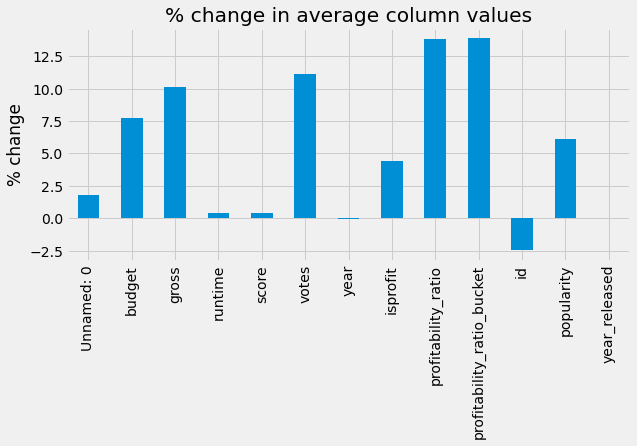

In [175]:
plt.figure(figsize=(9, 4))
change_in_means.plot.bar(title='% change in average column values')
# plt.bar(change_in_means)
plt.ylabel('% change')


Figure 1: Percent change in average column values
<p>Figure 1 shows the percent change in mean of columns before and after dropping missing-value rows.</p>

## 1.5. Imputing Missing Values

In [ ]:
# Fill in missing values with numeric quantities that are found from the existing dataset and algorithms

In [93]:
df.isnull().sum()

Unnamed: 0                       0
budget                           0
company                          0
country                          0
director                         0
genre                            0
gross                            0
name                             0
rating                           0
released                         0
runtime                          0
score                            0
star                             0
votes                            0
writer                           0
year                             0
isprofit                         0
profitability_ratio              0
profitability_ratio_bucket       0
adult                            0
id                               0
imdb_id                          0
original_title                   0
overview                         1
popularity                       0
tagline                        371
title                            0
genres_edited                    0
spoken_languages_edi

In [95]:
empty_overview_index = df[df['overview'].isnull()].index

In [96]:
df.loc[empty_overview_index]['overview']

855    NaN
Name: overview, dtype: object

In [97]:
df['overview'].fillna(df['overview'].mean(), inplace=True)
# upon trying to replace NaN with the mean we are unable to since overview is of type string and not numerical

TypeError: can only concatenate str (not "int") to str

## 1.6. Imputing Missing Values using Imputer

In [88]:
from sklearn.impute import SimpleImputer

In [215]:
imputer = SimpleImputer(strategy='most_frequent')

In [216]:
data_imputed = imputer.fit_transform(df)
# Cannot impute missing values for overview, tagline, spoken_languages_edited, production_countries_edited, and keywords_edited because they are all type Object containing strings
# Imputing tries to fill missing values with a numerical vaue which will not work in our case
# *** Fixed by using 'most_frequent' instead of mean for strategy type ***

In [217]:
type(data_imputed)

numpy.ndarray

In [221]:
data_imputed

array([[0, 8000000, 'Columbia Pictures Corporation', ..., 'US',
        'based on novel, friendship, coming of age, railroad track, story within the story, \xa0flipping coin, campfire story, reference to superman, normandy beach, child, 1950s, boys',
        1986],
       [1, 6000000, 'Paramount Pictures', ..., 'US',
        'chicago, high school, aftercreditsstinger, duringcreditsstinger',
        1986],
       [2, 15000000, 'Paramount Pictures', ..., 'US',
        'lovesickness, loss of lover, fighter pilot, self-discovery, pilot, ejection seat, dying and death, officer, training camp, air force, airplane, dangerous, battle assignment, u.s. navy, hostility, secret love, cowardliness, pilot school',
        1986],
       ...,
       [3521, 3800000, 'Other', ..., 'US', 'comedian, drama', 2016],
       [3522, 8500000, 'Other', ..., 'US',
        "middle school, based on children's book", 2016],
       [3523, 3500000, 'Other', ..., 'US',
        'dc comics, carnival, psychopath, joker, s

In [225]:
data_column_names = list(df.columns.values)

In [226]:
data_imputed = pd.DataFrame(data_imputed, columns=data_column_names)

In [227]:
type(data_imputed)

pandas.core.frame.DataFrame

In [228]:
data_imputed.head()

,Unnamed: 0,budget,company,country,director,genre,gross,name,rating,released,...,original_title,overview,popularity,tagline,title,genres_edited,spoken_languages_edited,production_countries_edited,keywords_edited,year_released
0,0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22.08.1986 00:00,...,Stand by Me,"After the death of a friend, a writer recounts...",15.207,"For some, it's the last real taste of innocenc...",Stand by Me,"Crime, Drama",en,US,"based on novel, friendship, coming of age, rai...",1986
1,1,6000000,Paramount Pictures,USA,Other,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11.06.1986 00:00,...,Ferris Bueller's Day Off,Charismatic teen Ferris Bueller plays hooky in...,12.7246,One man's struggle to take it easy.,Ferris Bueller's Day Off,Comedy,en,US,"chicago, high school, aftercreditsstinger, dur...",1986
2,2,15000000,Paramount Pictures,USA,Other,Action,179800601,Top Gun,PG,16.05.1986 00:00,...,Top Gun,For Lieutenant Pete 'Maverick' Mitchell and hi...,20.301,Up there with the best of the best.,Top Gun,"Action, Romance, War",en,US,"lovesickness, loss of lover, fighter pilot, se...",1986
3,3,18500000,Twentieth Century Fox Film Corporation,USA,Other,Action,85160248,Aliens,R,18.07.1986 00:00,...,Aliens,When Ripley's lifepod is found by a salvage cr...,21.7612,This Time It's War,Aliens,"Horror, Action, Thriller, Science Fiction",en,"GB, US","android, extraterrestrial technology, space ma...",1986
4,4,9000000,Walt Disney Pictures,USA,Other,Adventure,18564613,Flight of the Navigator,PG,1.08.1986 00:00,...,Flight of the Navigator,This 1986 Disney adventure tells the story of ...,5.52686,Come along on the greatest adventure of the su...,Flight of the Navigator,"Family, Science Fiction, Adventure",en,US,"artificial intelligence, farewell, homesicknes...",1986


In [229]:
data_imputed.describe()

,Unnamed: 0,budget,company,country,director,genre,gross,name,rating,released,...,original_title,overview,popularity,tagline,title,genres_edited,spoken_languages_edited,production_countries_edited,keywords_edited,year_released
count,3524,3524,3524,3524,3524,3524,3524,3524,3524,3524,...,3524,3524,3524.0,3524,3524,3524,3524,3524,3524,3524
unique,3524,302,21,2,21,16,3510,3512,9,1772,...,3512,3515,3516.0,3138,3516,907,353,261,3280,32
top,3523,30000000,Other,USA,Other,Comedy,0,0,R,0,...,0,0,0.0,0,0,Drama,en,US,independent film,2002
freq,1,142,1877,3027,3241,1074,9,9,1683,9,...,9,10,9.0,380,9,251,2530,2584,188,142


## 1.7. Finding Outliers

### 1.7.1. Z-Score Method

In [ ]:
# *** Outlier and Noisy Data ***
# *** Finding Outliers ***
# z-score

In [84]:
from scipy import stats

In [86]:
z = np.abs(stats.zscore(data_dropped))
# *** Cannot continue with z-score process becase the operations cannot be applied to string types ***

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### 1.7.2 IQR Score Method

In [98]:
Q1 = data_dropped.quantile(0.25)
Q3 = data_dropped.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0                    1.753000e+03
budget                        3.800000e+07
gross                         5.696776e+07
runtime                       2.100000e+01
score                         1.300000e+00
votes                         1.105460e+05
year                          1.400000e+01
isprofit                      1.000000e+00
profitability_ratio           1.573166e+00
profitability_ratio_bucket    1.600000e+02
id                            3.072650e+04
popularity                    5.786237e+00
year_released                 1.400000e+01
dtype: float64


In [99]:
print((data_dropped < (Q1 - 1.5 * IQR)) | (data_dropped > (Q3 + 1.5 * IQR)))

      Unnamed: 0  adult  budget  company  country  director  genre  \
0          False  False   False    False    False     False  False   
1          False  False   False    False    False     False  False   
2          False  False   False    False    False     False  False   
3          False  False   False    False    False     False  False   
4          False  False   False    False    False     False  False   
...          ...    ...     ...      ...      ...       ...    ...   
3518       False  False   False    False    False     False  False   
3519       False  False   False    False    False     False  False   
3520       False  False   False    False    False     False  False   
3522       False  False   False    False    False     False  False   
3523       False  False   False    False    False     False  False   

      genres_edited  gross     id  ...  runtime  score  \
0             False  False  False  ...    False  False   
1             False  False  False  ...    F

In [100]:
data_dropped.shape

(3031, 32)

In [181]:
data_dropped_outlier_IQR = data_dropped[~((data_dropped < (Q1 - 1.5 * IQR)) | (data_dropped > (Q3 + 1.5 * IQR))).any(axis=1)]

In [182]:
data_dropped_outlier_IQR.shape

(1993, 32)

In [183]:
data_dropped_outlier_IQR.describe()

,Unnamed: 0,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,1993.000000,1.993000e+03,1.993000e+03,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,1521.433517,3.049440e+07,3.242492e+07,105.378826,6.272554,61263.095334,2000.314099,0.462117,0.169192,16.883091,17145.391370,8.195990,2000.457602
std,862.791669,2.346240e+07,3.171940e+07,14.072621,0.841085,62732.010952,7.199724,0.498688,0.987599,98.824948,17224.743122,3.553912,7.251044
min,4.000000,5.000000e+04,3.090000e+02,69.000000,3.900000,704.000000,1986.000000,0.000000,-0.999979,-100.000000,5.000000,0.000578,1986.000000
25%,799.000000,1.250000e+07,7.411659e+06,96.000000,5.700000,15964.000000,1995.000000,0.000000,-0.560395,-60.000000,8643.000000,5.739829,1995.000000
50%,1518.000000,2.500000e+07,2.251810e+07,103.000000,6.300000,38469.000000,2001.000000,0.000000,-0.091684,-10.000000,10982.000000,7.941972,2001.000000
75%,2256.000000,4.300000e+07,4.847801e+07,114.000000,6.900000,85499.000000,2006.000000,1.000000,0.657938,70.000000,20009.000000,10.580421,2007.000000
max,3384.000000,1.050000e+08,1.522575e+08,147.000000,8.200000,294996.000000,2015.000000,1.000000,3.438159,340.000000,84329.000000,20.623642,2015.000000


## 1.8. Box Plot

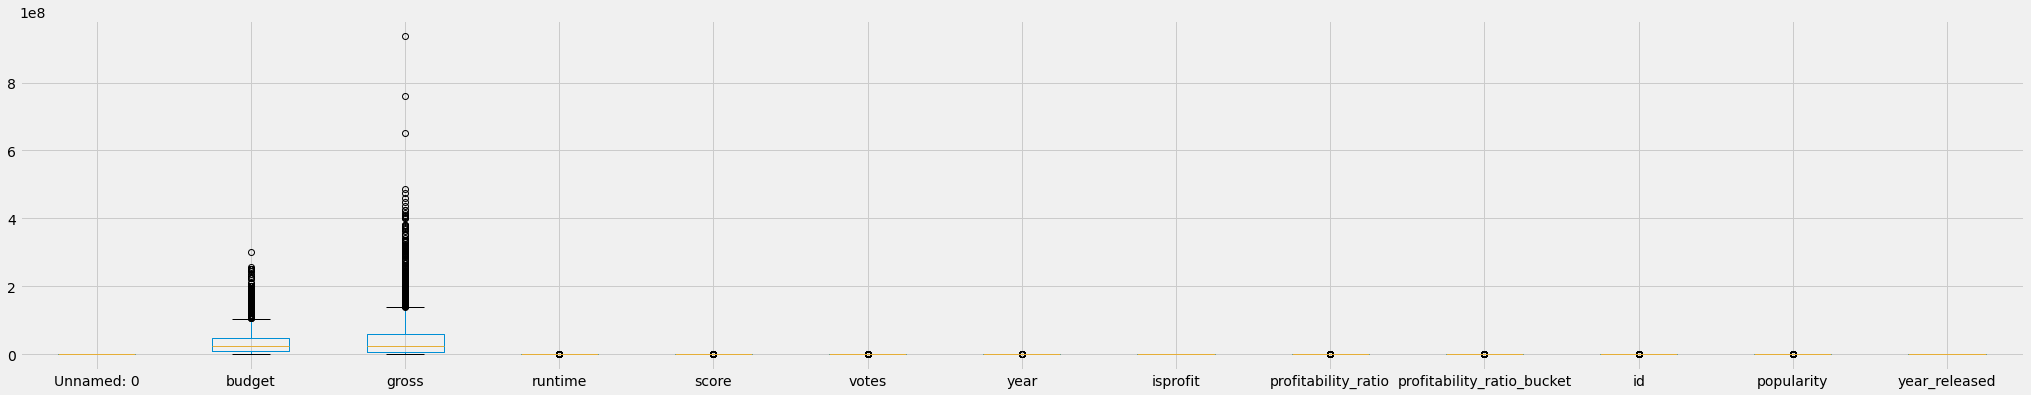

In [207]:
df.plot(x=df.index.name, kind='box', figsize=(32, 6))

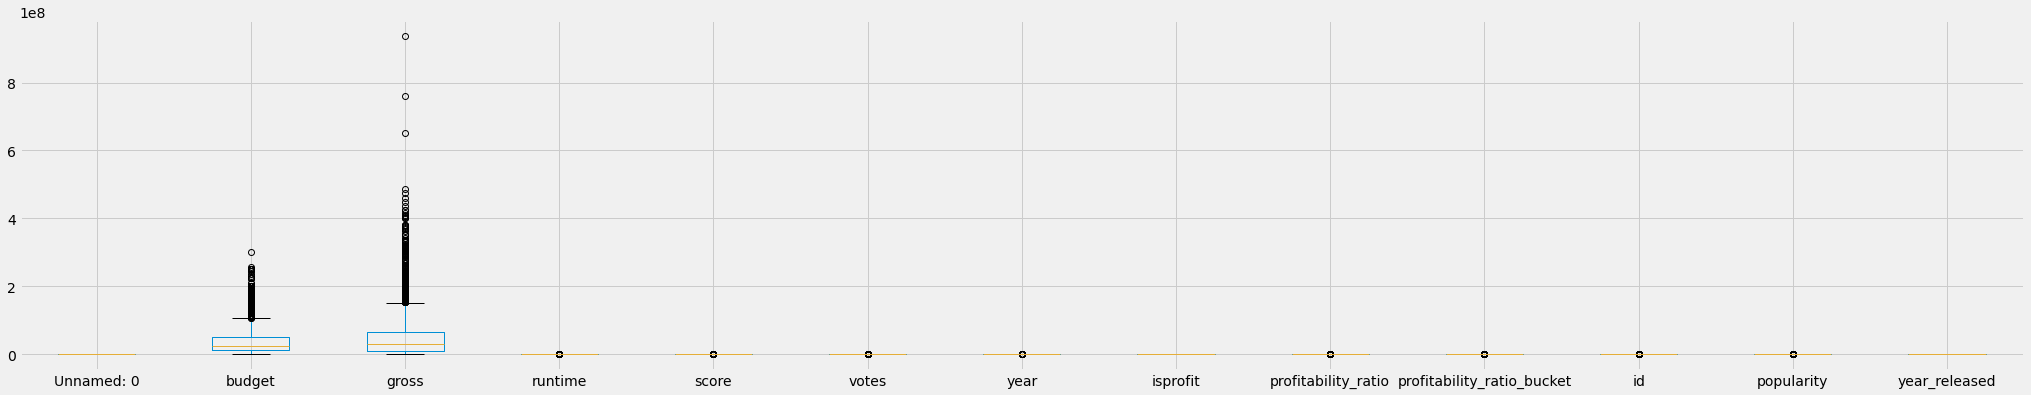

In [208]:
data_dropped.plot(x=data_dropped.index.name, kind='box', figsize=(32, 6))

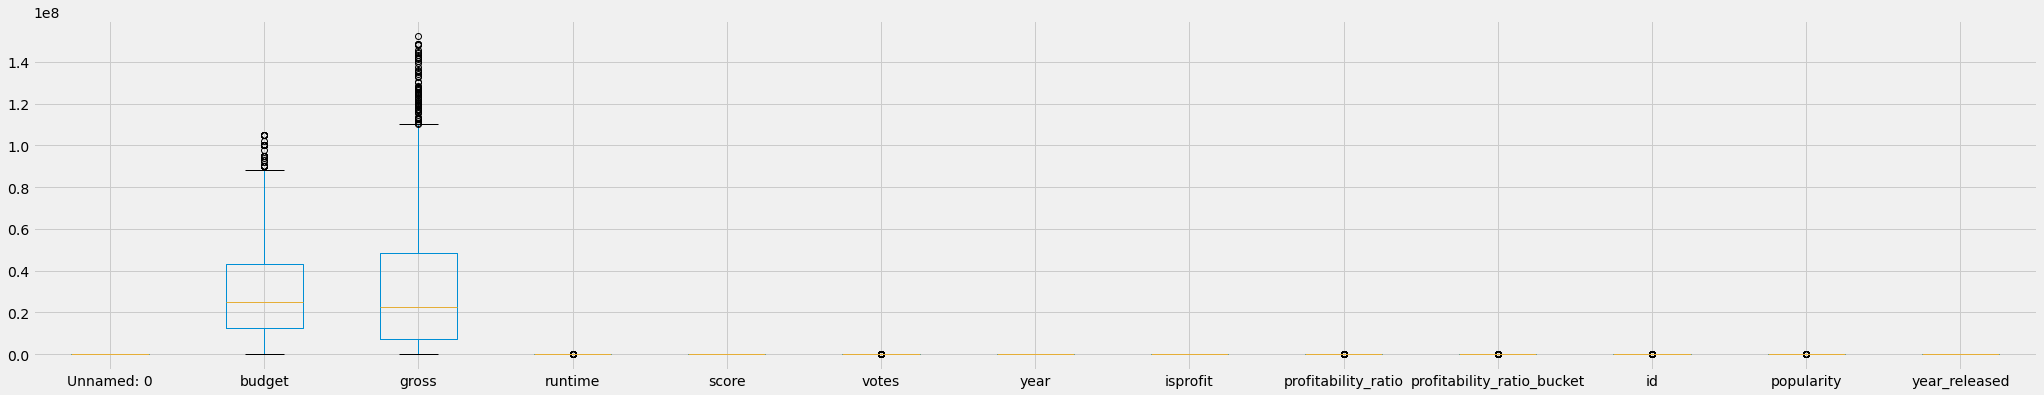

In [211]:
data_dropped_outlier_IQR.plot(x=data_dropped_outlier_IQR.index.name, kind='box', figsize=(32, 6))